In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Feature Engineering
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from scipy import stats
import pingouin as pg
from scipy.stats import shapiro
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from imblearn.over_sampling import RandomOverSampler, SMOTE

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
train = pd.read_csv('credit_train.csv')
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
train.shape

(100514, 19)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
train.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [6]:
train.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Terdapat row yang hanya berisi missing value, delete row yang semuanya berisi missing value

In [7]:
train = train[train.isna().all(axis=1)==False]

In [8]:
train.isna().sum()/len(train)

Loan ID                         0.00000
Customer ID                     0.00000
Loan Status                     0.00000
Current Loan Amount             0.00000
Term                            0.00000
Credit Score                    0.19154
Annual Income                   0.19154
Years in current job            0.04222
Home Ownership                  0.00000
Purpose                         0.00000
Monthly Debt                    0.00000
Years of Credit History         0.00000
Months since last delinquent    0.53141
Number of Open Accounts         0.00000
Number of Credit Problems       0.00000
Current Credit Balance          0.00000
Maximum Open Credit             0.00002
Bankruptcies                    0.00204
Tax Liens                       0.00010
dtype: float64

In [9]:
train.columns = train.columns.str.lower()

In [10]:
# Delete kolom months since last delinquent karena missing valuenya lebih dari 50%

train.drop('months since last delinquent', axis=1, inplace=True)

In [11]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [12]:
report(train)

,Column,d_type,unique_sample,n_uniques
0,loan id,object,"[14dd8831-6af5-400b-83ec-68e61888a048, 4771cc2...",81999
1,customer id,object,"[981165ec-3274-42f5-a3b4-d104041a9ca9, 2de017a...",81999
2,loan status,object,"[Fully Paid, Charged Off]",2
3,current loan amount,float64,"[445412.0, 262328.0, 99999999.0, 347666.0, 176...",22004
4,term,object,"[Short Term, Long Term]",2
5,credit score,float64,"[709.0, nan, 741.0, 721.0, 7290.0]",324
6,annual income,float64,"[1167493.0, nan, 2231892.0, 806949.0, 896857.0]",36174
7,years in current job,object,"[8 years, 10+ years, 3 years, 5 years, < 1 year]",11
8,home ownership,object,"[Home Mortgage, Own Home, Rent, HaveMortgage]",4
9,purpose,object,"[Home Improvements, Debt Consolidation, Buy Ho...",16


In [13]:
train.describe()

,current loan amount,credit score,annual income,monthly debt,years of credit history,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


Ada kejanggalan pada max credit score dan max current loan amount

In [14]:
train[train['credit score']>850]

,loan id,customer id,loan status,current loan amount,term,credit score,annual income,years in current job,home ownership,purpose,monthly debt,years of credit history,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,5.0,0.0,474658.0,742720.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99851,5eee6c31-62d4-400c-a81f-37bd373db926,039ee8d2-3321-4683-9592-cb1a360c34e2,Charged Off,198572.0,Short Term,7420.0,526205.0,2 years,Rent,Debt Consolidation,9910.02,16.5,8.0,0.0,296704.0,433224.0,0.0,0.0
99872,ce1f8220-7eba-4ec1-8bef-ca28f4916801,3e108ac9-9b7c-44a9-9289-e389cf3085b1,Charged Off,110924.0,Short Term,7070.0,804631.0,4 years,Rent,Debt Consolidation,11533.00,13.3,9.0,0.0,60154.0,96470.0,0.0,0.0
99906,096471bd-820e-4d0e-88a7-d699a59ab87a,4cfda7f6-790e-4493-a9b1-4d35a8b63af9,Charged Off,175362.0,Short Term,6880.0,1060162.0,9 years,Rent,Debt Consolidation,16079.13,17.3,13.0,0.0,277153.0,333234.0,0.0,0.0
99944,36da0533-8664-4156-8e96-f0d07966acdb,070e3aa9-d077-404c-8946-59ce976e0b70,Charged Off,88968.0,Short Term,6790.0,441845.0,< 1 year,Rent,other,5375.86,8.5,10.0,0.0,193306.0,535458.0,0.0,0.0


In [15]:
## Handle credit score > 850
train['credit score'] = np.where(train['credit score']>850, train['credit score']/10, train['credit score'])

In [16]:
# binning credit score
def binning_credscore(value):
    if 850 >= value >= 720.0 :
        result = 'Excellent'
    elif value >= 690.0 :
        result = 'Good'
    elif value >= 630.0 :
        result = 'Fair'
    elif value <= 629.0 :
        result = 'Poor'

    else :
        result = 'credit score out of range'
    return result

In [17]:
train['credit score'] = train['credit score'].dropna().apply(binning_credscore)

In [18]:
train['credit score'].value_counts()

Excellent    44213
Good         24247
Fair         11197
Poor          1189
Name: credit score, dtype: int64

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan id                    100000 non-null  object 
 1   customer id                100000 non-null  object 
 2   loan status                100000 non-null  object 
 3   current loan amount        100000 non-null  float64
 4   term                       100000 non-null  object 
 5   credit score               80846 non-null   object 
 6   annual income              80846 non-null   float64
 7   years in current job       95778 non-null   object 
 8   home ownership             100000 non-null  object 
 9   purpose                    100000 non-null  object 
 10  monthly debt               100000 non-null  float64
 11  years of credit history    100000 non-null  float64
 12  number of open accounts    100000 non-null  float64
 13  number of credit problems  100

In [20]:
# Handle current loan amount yg nilainya 99999999
train['current loan amount'].replace(99999999,np.nan, inplace=True)

In [21]:
# mengubah tipe data years in current job dari string menjadi float
train['years in current job'] = train['years in current job'].str.extract(r"(\d+)")
train['years in current job'] = train['years in current job'].astype(float)

In [22]:
train.isna().sum()

loan id                          0
customer id                      0
loan status                      0
current loan amount          11484
term                             0
credit score                 19154
annual income                19154
years in current job          4222
home ownership                   0
purpose                          0
monthly debt                     0
years of credit history          0
number of open accounts          0
number of credit problems        0
current credit balance           0
maximum open credit              2
bankruptcies                   204
tax liens                       10
dtype: int64

In [23]:
train['purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: purpose, dtype: int64

In [24]:
# Mengabungkan data other dan Other di kolom purpose
train['purpose'] = train['purpose'].replace('Other','other')
train['purpose'] = train['purpose'].replace('Take a Trip', 'vacation')

In [25]:
train.purpose.value_counts()

Debt Consolidation      78552
other                    9287
Home Improvements        5839
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
vacation                  674
major_purchase            352
small_business            283
moving                    150
wedding                   115
Educational Expenses       99
renewable_energy           10
Name: purpose, dtype: int64

## EDA

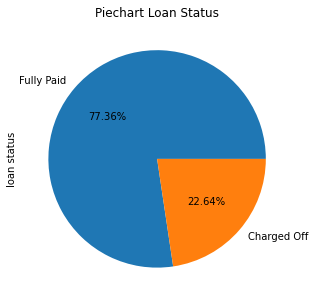

In [26]:
train['loan status'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(5,5))
plt.title('Piechart Loan Status')
plt.savefig('loanstatus.jpg', bbox_inches ="tight")
plt.show()

In [27]:
# Loan Status with their Term of Loan

pd.crosstab(train['term'], train['loan status'], normalize='index').sort_values(by='Charged Off')

loan status,Charged Off,Fully Paid
term,,
Short Term,0.197665,0.802335
Long Term,0.301022,0.698978


persentase orang yang gagal bayar pada long term lebih tinggi dibandingkan pada short term

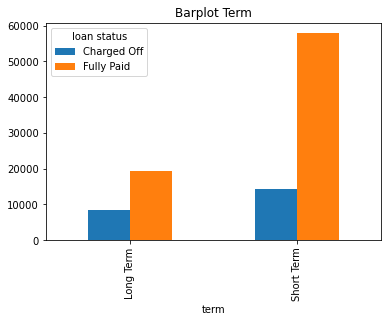

In [28]:
pd.crosstab(train['term'], train['loan status']).plot(kind='bar')
plt.title('Barplot Term')
plt.savefig('termloanstatus.jpg', bbox_inches ="tight")
plt.show()

In [29]:
pd.crosstab(train['credit score'], train['loan status'], normalize='index')

loan status,Charged Off,Fully Paid
credit score,,
Excellent,0.190193,0.809807
Fair,0.295526,0.704474
Good,0.208479,0.791521
Poor,0.367536,0.632464


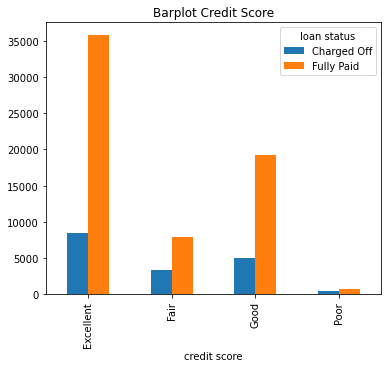

In [30]:
pd.crosstab(train['credit score'], train['loan status']).plot(kind='bar', figsize=(6,5))
plt.title('Barplot Credit Score')
plt.savefig('creditscore.jpg', bbox_inches ="tight")
plt.show()

In [31]:
pd.crosstab([train['credit score'], train['term']], train['loan status'], normalize='index')

loan status              Charged Off  Fully Paid
credit score term                               
Excellent    Long Term      0.249064    0.750936
             Short Term     0.180214    0.819786
Fair         Long Term      0.313793    0.686207
             Short Term     0.257072    0.742928
Good         Long Term      0.254577    0.745423
             Short Term     0.185658    0.814342
Poor         Long Term      0.368275    0.631725
             Short Term     0.360360    0.639640

<AxesSubplot:xlabel='credit score,term'>

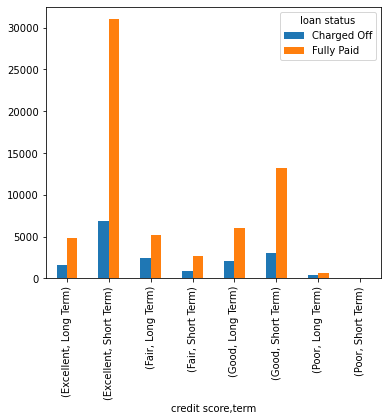

In [32]:
pd.crosstab([train['credit score'], train['term']], train['loan status']).plot(kind='bar', figsize=(6,5))

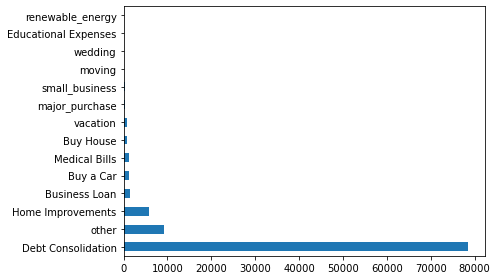

In [33]:
train['purpose'].value_counts().plot(kind='barh', figsize=(7,4))

plt.tight_layout()
plt.show()

In [34]:
pd.crosstab(train['purpose'], train['loan status'], normalize='index').sort_values(by='Charged Off')

loan status,Charged Off,Fully Paid
purpose,,
Buy a Car,0.160474,0.839526
Educational Expenses,0.181818,0.818182
Home Improvements,0.199178,0.800822
wedding,0.200000,0.800000
Buy House,0.206490,0.793510
vacation,0.213650,0.786350
other,0.218154,0.781846
Debt Consolidation,0.228104,0.771896
major_purchase,0.232955,0.767045


Ada `Other` dan `other` pada kolom `purpose`. Purpose small business memiliki persentase orang gagal bayar yang paling banyak dibandingkan purpose lainnya

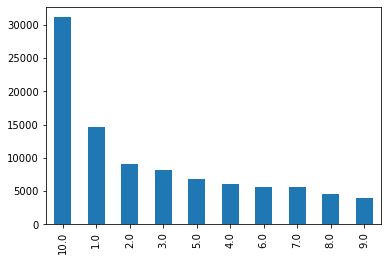

In [35]:
train['years in current job'].value_counts().plot(kind='bar')

plt.show()

In [36]:
pd.crosstab(train['years in current job'], train['loan status'], normalize='index').sort_values(by='Charged Off')

loan status,Charged Off,Fully Paid
years in current job,,
3.0,0.211776,0.788224
10.0,0.216060,0.783940
2.0,0.219181,0.780819
4.0,0.223995,0.776005
5.0,0.225726,0.774274
8.0,0.229376,0.770624
7.0,0.231128,0.768872
6.0,0.232149,0.767851
1.0,0.232563,0.767437


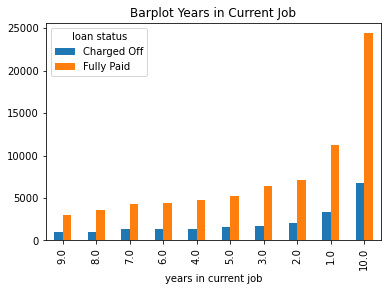

In [37]:
pd.crosstab(train['years in current job'], train['loan status']).sort_values(by='Charged Off').plot(kind='bar')
plt.title('Barplot Years in Current Job')
plt.savefig('exploanstatus.jpg', bbox_inches ="tight")
plt.show()

Berdasarkan data di atas, persentase orang gagal bayar berdasarkan lamanya dia bekerja tidak jauh berbeda.

In [38]:
train['home ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: home ownership, dtype: int64

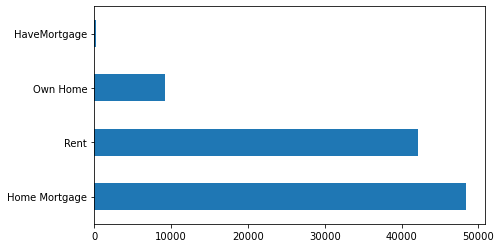

In [39]:
train['home ownership'].value_counts().plot(kind='barh', figsize=(7,4))

plt.show()

In [40]:
pd.crosstab(train['home ownership'], train['loan status'], normalize='index')

loan status,Charged Off,Fully Paid
home ownership,,
HaveMortgage,0.144860,0.855140
Home Mortgage,0.204710,0.795290
Own Home,0.228926,0.771074
Rent,0.251126,0.748874


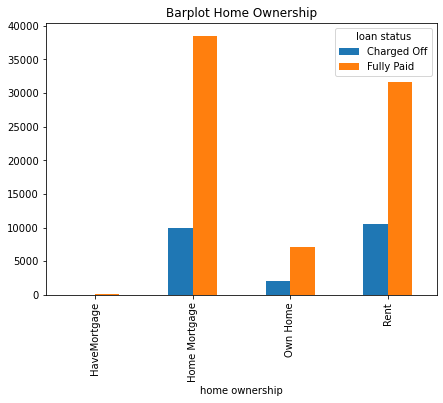

In [41]:
pd.crosstab(train['home ownership'], train['loan status']).plot(kind='bar', figsize=(7,5))
plt.title('Barplot Home Ownership')
plt.savefig('home.jpg', bbox_inches ="tight")
plt.show()

nasabah yang rumahnya masih menyewa memiliki persentase gagal bayar terbesar

In [42]:
train.columns

Index(['loan id', 'customer id', 'loan status', 'current loan amount', 'term',
       'credit score', 'annual income', 'years in current job',
       'home ownership', 'purpose', 'monthly debt', 'years of credit history',
       'number of open accounts', 'number of credit problems',
       'current credit balance', 'maximum open credit', 'bankruptcies',
       'tax liens'],
      dtype='object')

In [43]:
pd.crosstab(train['number of credit problems'], train['loan status'])

loan status,Charged Off,Fully Paid
number of credit problems,,
0.0,19481,66554
1.0,2704,9373
2.0,309,990
3.0,86,292
4.0,35,90
5.0,17,32
6.0,3,14
7.0,2,6
8.0,0,4


Ada yg number of credit problemsnya 15 tapi berhasil bayar???

In [44]:
train[train['number of credit problems']==15]

,loan id,customer id,loan status,current loan amount,term,credit score,annual income,years in current job,home ownership,purpose,monthly debt,years of credit history,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
29583,5be5d1c0-b36c-4781-b571-23fe7d8abc0a,cd9ef8c5-03a4-4e4c-a7be-97cec58a5807,Fully Paid,447392.0,Short Term,Excellent,1410294.0,10.0,Own Home,Debt Consolidation,15513.31,20.1,5.0,15.0,301549.0,478984.0,0.0,15.0


In [45]:
train['bankruptcies'].value_counts()

0.0    88774
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: bankruptcies, dtype: int64

In [46]:
pd.crosstab(train['bankruptcies'], train['loan status'])

loan status,Charged Off,Fully Paid
bankruptcies,,
0.0,20183,68591
1.0,2287,8188
2.0,92,325
3.0,18,75
4.0,7,20
5.0,2,5
6.0,0,2
7.0,0,1


ada yang bankruptcies 7 tp berhasil bayar

In [47]:
train[train['bankruptcies']==7]

,loan id,customer id,loan status,current loan amount,term,credit score,annual income,years in current job,home ownership,purpose,monthly debt,years of credit history,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
33682,a02938aa-43cc-4aaa-a2a7-f2fda5654477,bec520de-23c0-4c99-8620-e83163ead72b,Fully Paid,221914.0,Short Term,Excellent,2012366.0,5.0,Rent,Debt Consolidation,20123.66,17.7,11.0,7.0,126597.0,213092.0,7.0,0.0


In [48]:
train['tax liens'].value_counts()

0.0     98062
1.0      1343
2.0       374
3.0       111
4.0        58
5.0        16
6.0        12
7.0         7
9.0         3
11.0        2
15.0        1
10.0        1
Name: tax liens, dtype: int64

In [49]:
pd.crosstab(train['tax liens'], train['loan status'])

loan status,Charged Off,Fully Paid
tax liens,,
0.0,22150,75912
1.0,330,1013
2.0,90,284
3.0,36,75
4.0,21,37
5.0,6,10
6.0,2,10
7.0,3,4
9.0,1,2


ada yang tax liensnya 15 tapi berhasil bayar

In [50]:
# number of credit problemsnya 15
train[train['tax liens']==15]

,loan id,customer id,loan status,current loan amount,term,credit score,annual income,years in current job,home ownership,purpose,monthly debt,years of credit history,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
29583,5be5d1c0-b36c-4781-b571-23fe7d8abc0a,cd9ef8c5-03a4-4e4c-a7be-97cec58a5807,Fully Paid,447392.0,Short Term,Excellent,1410294.0,10.0,Own Home,Debt Consolidation,15513.31,20.1,5.0,15.0,301549.0,478984.0,0.0,15.0


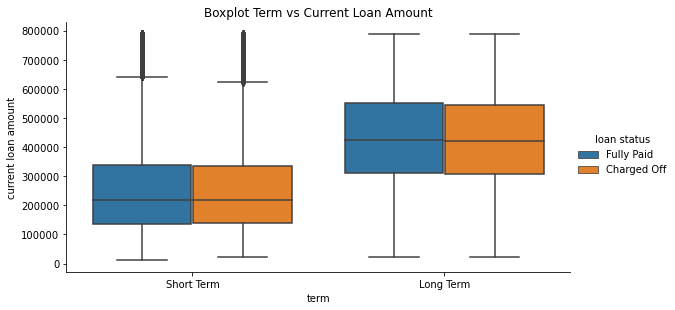

In [51]:
#Boxplot current loan amount berdasarkan term dan loan status
sns.catplot(x='term', y='current loan amount', hue='loan status',
                data=train, kind="box",
                height=4, aspect=2)
plt.title('Boxplot Term vs Current Loan Amount')
plt.show()

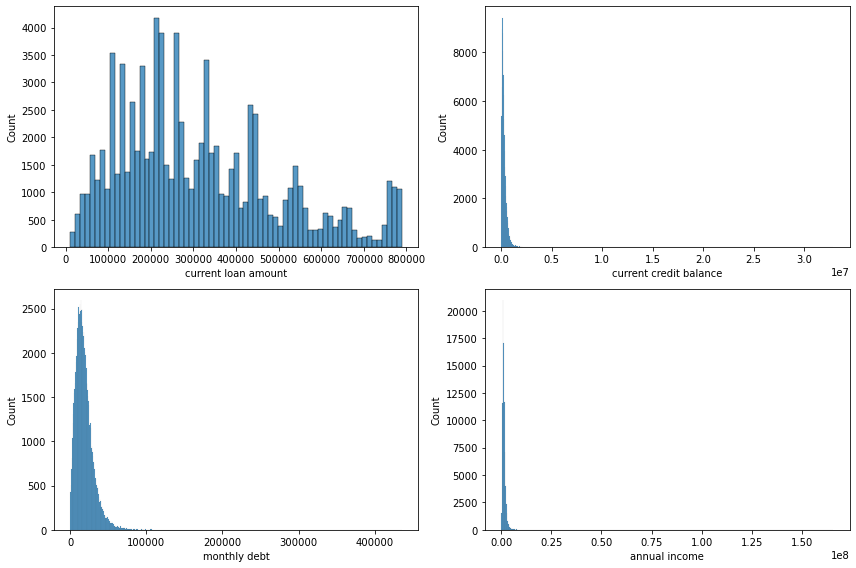

In [52]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.histplot(train['current loan amount'])
plt.subplot(222)
sns.histplot(train['current credit balance'], bins=1000)
plt.subplot(223)
sns.histplot(train['monthly debt'])
plt.subplot(224)
sns.histplot(train['annual income'], bins=500)
plt.tight_layout()

plt.show()

In [53]:
train.columns

Index(['loan id', 'customer id', 'loan status', 'current loan amount', 'term',
       'credit score', 'annual income', 'years in current job',
       'home ownership', 'purpose', 'monthly debt', 'years of credit history',
       'number of open accounts', 'number of credit problems',
       'current credit balance', 'maximum open credit', 'bankruptcies',
       'tax liens'],
      dtype='object')

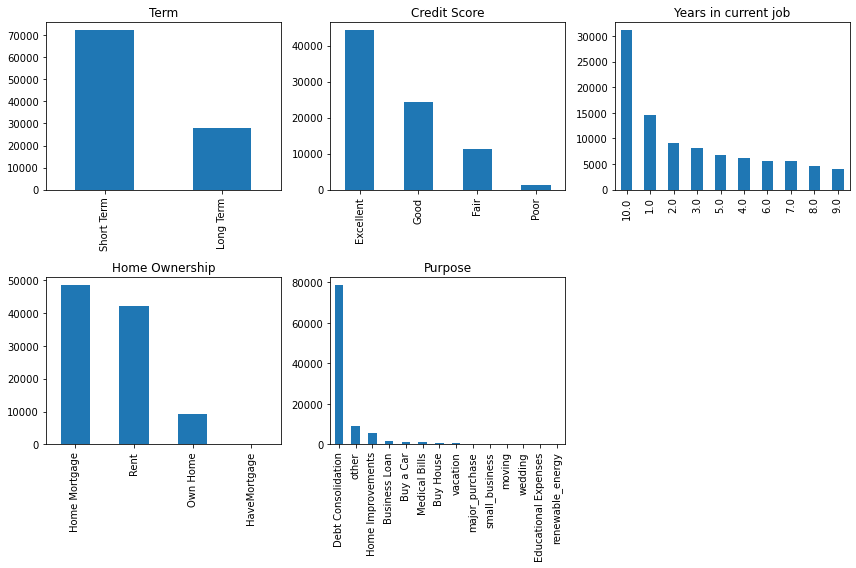

In [54]:
plt.figure(figsize=(12,8))
plt.subplot(231)
train['term'].value_counts().plot(kind='bar')
plt.title('Term')
plt.subplot(232)
train['credit score'].value_counts().plot(kind='bar')
plt.title('Credit Score')
plt.subplot(233)
train['years in current job'].value_counts().plot(kind='bar')
plt.title('Years in current job')
plt.subplot(234)
train['home ownership'].value_counts().plot(kind='bar')
plt.title('Home Ownership')
plt.subplot(235)
train['purpose'].value_counts().plot(kind='bar')
plt.title('Purpose')
plt.tight_layout()
plt.savefig('distcat.jpg', bbox_inches ="tight")
plt.show()